# Machine Leanring with Python Introduction

In [2]:
'''
The objective of this course is to give you a whilistic understanding of machine leanring, covering theory, application, and inner workings of supervised, unsupervised, and deep leanring algorithms

linear regression : 线性回归
K Nearest Neighbors: K 邻域
Suport Vector Machines: SVM 
flat clustering : 平面聚类
hierarchical clustering: 层次聚类
neural networks: 神经网络

Machine learning was defined in 1959 by Arthur Samuel
'''

'\nThe objective of this course is to give you a whilistic understanding of machine leanring, covering theory, application, and inner workings of supervised, unsupervised, and deep leanring algorithms\n\nlinear regression : 线性回归\nK Nearest Neighbors: K 邻域\nSuport Vector Machines: SVM \nflat clustering : 平面聚类\nhierarchical clustering: 层次聚类\nneural networks: 神经网络\n\nMachine learning was defined in 1959 by Arthur Samuel\n'

# P.2 Regression - Intro and Data

In [9]:
# Regression is a form of supervised machine learning 监督学习 回归曲线
# regression is popularly used with stock prices
import pandas as pd 
import quandl

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


# p3. Regression - Features and Labels

In [15]:
# Regression is a form of supervised machine learning 监督学习 回归曲线
# regression is popularly used with stock prices
import pandas as pd 
import quandl
import math 
import numpy as np  # convert data to numpy array 
from sklearn import preprocessing, svm  # preprocessing do some clearning/scaling of data prior 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

# The features are the descriptive attributes, and the label is what you're attempting to predict or frecast
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True) # fill any NaN data with -9999
# the smallest integer than or equal to x 
forecast_out = int(math.ceil(0.01 * len(df))) # forecast out 1% of the entire length of the dataset

df['label'] = df[forecast_col].shift(-forecast_out) # ???????

# Now we have the data that comprises out features and labels
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.639972
2004-08-20   54.322689  8.537313    7.227007   22834300.0  69.078238
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  67.839414
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  68.912727
2004-08-25   53.164113  3.966115    1.183658    9188600.0  70.668146


# P4. Regression - Training and Testing

In [28]:
# Regression is a form of supervised machine learning 监督学习 回归曲线
# regression is popularly used with stock prices
import pandas as pd 
import quandl
import math 
import numpy as np  # convert data to numpy array 
from sklearn import preprocessing, svm  # preprocessing do some clearning/scaling of data prior 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

# The features are the descriptive attributes, and the label is what you're attempting to predict or frecast
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True) # fill any NaN data with -9999
# the smallest integer than or equal to x 
forecast_out = int(math.ceil(0.01 * len(df))) # forecast out 1% of the entire length of the dataset

df['label'] = df[forecast_col].shift(-forecast_out) # ???????

# drop NaN information from the dataframe 
df.dropna(inplace=True)

# define X (capital x) as the feature, define y (lowercase) as the label 
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

# Generally, you want your features in machine learning to be in a range of -1 to 1 
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define our classifier: use Support Vector Regression from Scikit-Learn svm package
clf = svm.SVR()  # Support Vector Regression 

# ready to train it 
clf.fit(X_train, y_train)

# Wow we can test it
confidence = clf.score(X_test, y_test)

print("sklearn.svm.SVR : ",confidence)

# using LinearRegression from sklearn 
clf = LinearRegression(n_jobs=-1) # n_jobs=-1 will use all available threads 

# ready to train it 
clf.fit(X_train, y_train)

# Wow we can test it
confidence = clf.score(X_test, y_test)

print("LinearRegression : ",confidence)

# Choosing the right estimator 选择正确的评估器
# It's really trial and error 

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k, confidence)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0
sklearn.svm.SVR :  0.8244022376049817
LinearRegression :  0.9762946759762654
linear 0.9752850630987471
poly 0.6591706480684271
rbf 0.8244022376049817
sigmoid 0.9032142570161316


# P5. Regression - Forecasting and Predicting

LinearRegression :  0.9757089778125991
[1064.96169619 1069.82389737 1072.48311812 1068.46378862 1072.10487119
 1077.83716092 1092.23285395 1105.74556346 1100.42296525 1093.98338797
 1091.78295215 1090.38902574 1086.65171691 1080.83892887 1076.38273108
 1074.51444564 1093.31694544 1111.83874027 1116.96214129 1131.6664835
 1135.86957914 1134.04236999 1131.80459758 1133.49520845 1151.44295235
 1150.83578181 1160.37121557 1157.01486681 1165.33182368 1185.33713546
 1198.34294087 1192.12838134 1204.196891   1208.92844953] 0.9757089778125991 34
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.639972       NaN
2004-08-20   54.322689  8.537313    7.227007   22834300.0  69.078238       NaN
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  67.839414       NaN
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  68

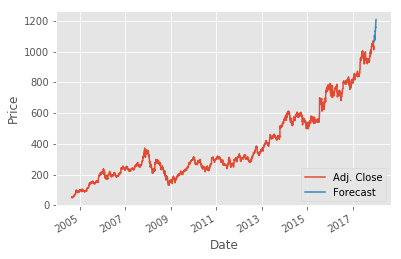

In [42]:
# Regression is a form of supervised machine learning 监督学习 回归曲线
# regression is popularly used with stock prices
import pandas as pd 
import quandl
import math 
import datetime
import matplotlib.pyplot as plt 
from matplotlib import style 
import numpy as np  # convert data to numpy array 
from sklearn import preprocessing, svm  # preprocessing do some clearning/scaling of data prior 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

# The features are the descriptive attributes, and the label is what you're attempting to predict or frecast
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True) # fill any NaN data with -9999
# the smallest integer than or equal to x 
forecast_out = int(math.ceil(0.01 * len(df))) # forecast out 1% of the entire length of the dataset


df['label'] = df[forecast_col].shift(-forecast_out) # ???????


# define X (capital x) as the feature, define y (lowercase) as the label 
X = np.array(df.drop(['label'], 1))
# Generally, you want your features in machine learning to be in a range of -1 to 1 
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# drop NaN information from the dataframe 
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# using LinearRegression from sklearn 
clf = LinearRegression(n_jobs=-1) # n_jobs=-1 will use all available threads 

# ready to train it 
clf.fit(X_train, y_train)

# Wow we can test it
confidence = clf.score(X_test, y_test)

print("LinearRegression : ",confidence)

forecast_set = clf.predict(X_lately)

print(forecast_set, confidence, forecast_out)


style.use('ggplot')

# add a new column 
df['Forecast'] = np.nan 

last_date = df.iloc[-1].name 
print(last_date)
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day 

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] +[i]

df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# P6. Pickling and Scaling

LinearRegression :  0.9776549779336077
[1066.45057394 1071.00557505 1073.75863743 1069.46610779 1073.40399552
 1079.08907096 1093.59246939 1107.15680109 1101.52630508 1094.93768217
 1092.96674596 1091.83877877 1087.85667995 1081.92116403 1077.42171082
 1075.87994855 1094.93749322 1113.37185395 1118.22100054 1133.14161746
 1137.30975538 1135.14209613 1133.25739414 1134.83500613 1153.03838731
 1151.45422415 1161.59593914 1158.02858278 1166.77461576 1186.88962668
 1199.77034162 1192.71104797 1205.45713635 1209.94492633] 0.9776549779336077 34
2017-12-06 00:00:00


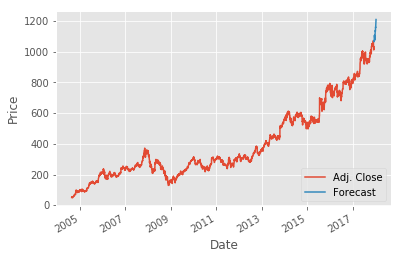

In [44]:
# Regression is a form of supervised machine learning 监督学习 回归曲线
# regression is popularly used with stock prices
import pandas as pd 
import pickle 
import quandl
import math 
import datetime
import matplotlib.pyplot as plt 
from matplotlib import style 
import numpy as np  # convert data to numpy array 
from sklearn import preprocessing, svm  # preprocessing do some clearning/scaling of data prior 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0 
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

# The features are the descriptive attributes, and the label is what you're attempting to predict or frecast
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True) # fill any NaN data with -9999
# the smallest integer than or equal to x 
forecast_out = int(math.ceil(0.01 * len(df))) # forecast out 1% of the entire length of the dataset


df['label'] = df[forecast_col].shift(-forecast_out) # ???????


# define X (capital x) as the feature, define y (lowercase) as the label 
X = np.array(df.drop(['label'], 1))
# Generally, you want your features in machine learning to be in a range of -1 to 1 
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# drop NaN information from the dataframe 
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # using LinearRegression from sklearn 
# clf = LinearRegression(n_jobs=-1) # n_jobs=-1 will use all available threads 

# # ready to train it 
# clf.fit(X_train, y_train)

# # Wow we can test it
# confidence = clf.score(X_test, y_test)

# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)


print("LinearRegression : ",confidence)

forecast_set = clf.predict(X_lately)

print(forecast_set, confidence, forecast_out)

style.use('ggplot')

# add a new column 
df['Forecast'] = np.nan 

last_date = df.iloc[-1].name 
print(last_date)
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day 

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] +[i]

df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# P7. Regression - Theory and how it works

'''
Linear algebra is essential to machine leanring and it is useful to understand the true building block that machine learning is built upon 
'''
<img src='images/best-fit-slope.png'>
<img src='images/best-fit-y-intercept.png'>






# P8. Regression - How to program the Best Fit Slope

In [2]:
from statistics import mean  # get the mean of a lost or array 
import numpy as np 

xs = [1,2,3,4,5] # features
ys = [5,4,6,5,6] # labels

xs = np.array(xs, dtype=np.float64) # numpy arrays
ys = np.array(ys, dtype=np.float64)

# there's our skeleton
def best_fit_slope(xs, ys):
    # While Python does support something like ^2 it's not going to work on our Numpy array float64 datatype
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs*xs)))
    return m 

m = best_fit_slope(xs, ys)
print(m)


0.29999999999999893


# P9. Regression - How to program the Best Fit Lion

0.29999999999999893 4.300000000000003


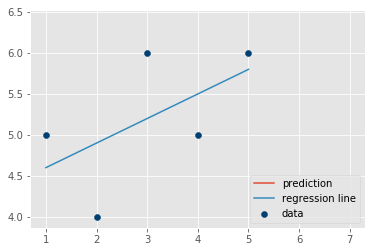

In [10]:
# Let's reap the fruits of our labor finally
from statistics import mean  # get the mean of a lost or array 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 

style.use('ggplot')

xs = [1,2,3,4,5] # features
ys = [5,4,6,5,6] # labels

xs = np.array(xs, dtype=np.float64) # numpy arrays
ys = np.array(ys, dtype=np.float64)

# there's our skeleton
def best_fit_slope_and_intercept(xs, ys):
    # While Python does support something like ^2 it's not going to work on our Numpy array float64 datatype
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b 


m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)
regression_line = [(m*x)+b for x in xs]

# predict out a couple of points 
predict_x = 7 
predict_y = (m*predict_x) + b
plt.scatter(xs, ys, color='#003F72', label='data')
plt.plot(predict_x, predict_y, label='prediction')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

# P10. Regression - R Squared and Coefficient of Determination Theory

# The standard way to check for errors is by using squared errors.平均误差
<img src='images/coefficient-of-determination-r-squared.png'>


# P11. Regression - How to Program R Squared

In [11]:
# Let's reap the fruits of our labor finally
from statistics import mean  # get the mean of a lost or array 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 

style.use('ggplot')

xs = [1,2,3,4,5] # features
ys = [5,4,6,5,6] # labels

xs = np.array(xs, dtype=np.float64) # numpy arrays
ys = np.array(ys, dtype=np.float64)

# there's our skeleton
def best_fit_slope_and_intercept(xs, ys):
    # While Python does support something like ^2 it's not going to work on our Numpy array float64 datatype
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b 

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return (1 - (squared_error_regr/squared_error_y_mean))

m, b = best_fit_slope_and_intercept(xs, ys)
regression_lion = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)



0.3214285714285714


# P12. Creating Sample Data for Testing

In [1]:
# Let's reap the fruits of our labor finally
from statistics import mean  # get the mean of a lost or array 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
import random 



style.use('ggplot')

xs = [1,2,3,4,5] # features
ys = [5,4,6,5,6] # labels

xs = np.array(xs, dtype=np.float64) # numpy arrays
ys = np.array(ys, dtype=np.float64)

# there's our skeleton
def best_fit_slope_and_intercept(xs, ys):
    # While Python does support something like ^2 it's not going to work on our Numpy array float64 datatype
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b 

# hm -- how much
# variance -- 
def create_dataset(hm, variance, step=2, correlation=False):
    val = []
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step 
        elif correlation and correlation == 'neg':
            val -= step 
    
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)



def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return (1 - (squared_error_regr/squared_error_y_mean))

xs, ys = create_dataset(40, 40, 2, correlation='pos')
m, b = best_fit_slope_and_intercept(xs, ys)
regression_lion = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys, color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()





ModuleNotFoundError: No module named 'numpy'

# P13. Classification Intro with K Nearest Neighbors

In [ ]:
'''
Major classificiation algorithms:
    K Nearest Neighbors
        use an odd number for K 
        
    Support Vector Machine
'''

# P14. Applying K Nearest Neighbors to Data

In [9]:
'''
Missing/bad data
'''
import numpy as np 
from sklearn import preprocessing, neighbors  # preprocessing do some clearning/scaling of data prior 
from sklearn.model_selection import train_test_split 
import pandas as pd 

df = pd.read_csv('data/classificationData/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
# Adding noise can be a away to help or hurt your algorithm.When combatting your robot overlords, being able to distinguish between helpful noise and malicious may save your life.
df.drop(['id'], 1, inplace=True) # dropping of the id column

# features(X) and labels(y)
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

# create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the classifier
clf = neighbors.KNeighborsClassifier()

# Train the classifier
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

# 
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

# had two samples?
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9571428571428572
[2]
[2 2]


# P15. Euclidean Distance theory [欧式距离]

'''
all this algorithm is actually doing is computing distance between points, and then picking the most popular class of the top K classes of points nearest to it.

Euclidean Distance, named after Euclid欧几里得 -- the father of Geometry.
'''

Euclidean distance 
<img src='images/euclidean-distance.png'>
So what's all this business? Basically, it's just the square root of the sum of the distance of the points from eachother, squared.

In [10]:
import math 

plot1 = [1, 3]
plot2 = [2, 5]
euclidean_distance = math.sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
print(euclidean_distance)

'''
That's basically the main math behind K Nearest Neighbors right there, now we just need to build a system to handle for the rest of the algorithm, like finding the closest distances, their group, and the voting
'''

2.23606797749979


# P16. Creating a K Nearest Neighbors Classifier from scratch

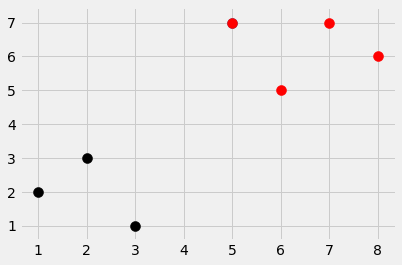

In [14]:
import numpy as np # Numpy is a C-optimized and very efficient library, allowing us to perform math much quicker in many cases
import warnings
from collections import Counter
import matplotlib.pyplot as plt 
from matplotlib import style 
import warnings
from math import sqrt
from collections import Counter 
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            # Euclidean distance 欧几里得距离
            euclidean_distance = sqrt( (features[0] - predict[0]) ** 2 + (features[1] - predict[1]) ** 2)
            distances.append([euclidean_distance, group])
            
        votes = [i[1] for i in sorted(distances)[:k]]
        # Collections finds the most common elements
        vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result


dataset = {'k' :[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

plt.figure()
# plt.scatter 散点图
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)
plt.show()


# P18. Testing our K Nearest Neighbors classifier

In [15]:
import numpy as np 
import warnings 
from collections import Counter 
import pandas as pd 
import random 

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            # Euclidean distance 欧几里得距离
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
        votes = [i[1] for i in sorted(distances)[:k]]
        # Collections finds the most common elements
        vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

# loading data 
df = pd.read_csv('data/classificationData/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
# Adding noise can be a away to help or hurt your algorithm.When combatting your robot overlords, being able to distinguish between helpful noise and malicious may save your life.
df.drop(['id'], 1, inplace=True) # dropping of the id column
full_data = df.astype(float).values.tolist() # convert the data to a list of lists

# shuffle the data, and then split it up 
random.shuffle(full_data) # contains both the features and labels
test_size = 0.2 

train_set = {2:[], 4:[]} # 2 is for the binign[良性] tumors 
test_set = {2:[], 4:[]} # 4 is for the malignant[恶性] tumors

train_data = full_data[:-int(test_size*len(full_data))] # first 80% as train_data 
test_data = full_data[-int(test_size*len(full_data)):] # test_data slicing the final 20% 

for i in train_data:
    train_set[i[-1]].append(i[:-1]) # the key is the class, and the values are the attributes

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy:', correct/total)

Accuracy: 0.9712230215827338


# P19. Final thoughts on K Nearest Neighbors

In [ ]:
'''
With Scikit-Learn, the KNN classifier comes with a parallel processing parameter called n_jobs
K Nearest Neighbors is very useful since it performs well on both linear and non-linear data.
'''

# P20. Support Vector Machine introducting

In [ ]:
'''
Support Vector Machine
    -- The objective of the SUpport Vector Machine is to find the best spliting boundary between data
'''
